# Figure for the Decadal State of the Climate 2011-2020
***
This notebook describe the creation of certain figures of the WMO Decadal State of the Climate report (2011-2020) <br>
Document number : 1338 <br>
Link to the report : https://lnkd.in/dct2shQu <br>
Access to my plotly chart studio : https://chart-studio.plotly.com/~benjaminpire#/

***
![title](docs/WMO_Logo_English.png)
***
Summary:<br>

- [Package importation and initialization](#init)  <br>
- [Figure 1-2-3 . Decadal averaged mole fraction in parts per million (ppm) from 1991-2020.](#1-2-3) 
- [Figure 8 : National highest temperature by decade](#8)
- [Figure 9 : Ocean Heat Content (OHC)](#9)
- [Figure 11 : Evolution of the global mean sea level and Interannual variability](#11)
- [Figure 14 : Mass changes of reference glaciers ](#14)
- [Figure 16 : Cumulative annual and decadal ice sheet mass change from 1992 to 2020](#16)
- [Figure 17 : Sea ice extent for the Arctic (left) and Antarctic (right) ](#17)
- [Figure 19 : NOAA Oceanic Nino 3.4 Index for the 2011-2020 decade](#19)
- [Figure 21 : Number of reported weather-related disasters with more than 1000 deaths by disaster type and region or USD 10B in economic losses](#21)

***
This note book also shows interactives solutions for certain figures of the decadal report that are going to be used for the storyboard:

Link to the storyboard : https://ow.ly/R9sV50Qf4Ug 


- [Figure 9 : Ocean Heat Content (OHC)](#9_inter)
- [Figure 11 : Evolution of the global mean sea level](#11_inter)
- [Figure 14 : Mass changes of reference glaciers ](#14_inter)
- [Figure 16 : Cumulative annual and decadal ice sheet mass change from 1992 to 2020](#16_inter)
- [Figure 17 : Sea ice extent for the Arctic (left) and Antarctic (right) ](#17_inter)

***
Finally the note book also helps to create gif animations solutions for certain figures of the decadal report that are going to be used for certain social medias publications:

- [Figure 9 : Ocean Heat Content (OHC)](#9_gif)
- [Figure 11 : Evolution of the global mean sea level](#11_gif)
- [Figure 14 : Mass changes of reference glaciers ](#14_gif)
- [Figure 16 : Cumulative annual and decadal ice sheet mass change from 1992 to 2020](#16_gif)
- [Figure 17 : Sea ice extent for the Arctic (left) and Antarctic (right) ](#17_gif)



Access to the data : <br>

Figure 14 : Mass changes of reference glaciers : https://wgms.ch/data_databaseversions/ <br>
Figure 19 : NOAA Oceanic Nino 3.4 Index for the 2011-2020 decade : https://www.climate.gov/maps-data/all?listingMain=datasetgallery <br>

# Package importation and initialization <a id="init"></a>

In [11]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import datetime as dt
import imageio
import requests
import sharepy


# To create interactive graphs
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import io


# To share interactive graphs
import chart_studio
import chart_studio.plotly as py

# To create GIF animations
import PIL
from PIL import Image, ImageDraw


In [82]:
plotly_config = ['zoom','pan',"select", "lasso2d","zoomIn","zoomOut","autoScale","resetScale"]

In [83]:
chart_studio.tools.set_credentials_file(username = "benjaminpire",
                                       api_key = "VDHVKsrb9dT3fWudeKxw")

Create a the folder '**figures**' where all the figures are going to be saved.

In [84]:
os.makedirs("./figures", exist_ok=True)

In [85]:
os.makedirs("./figures/animations/", exist_ok=True)

***
# Figure 1-2-3 : <br>Decadal averaged mole fraction in parts per million (ppm) from 1991-2020. <a id="1-2-3"></a> 

## Cleaning 



1. Extract the data

In [13]:
URL = 'https://wmoomm.sharepoint.com/sites/Services/Documents/CS_Climate Monitoring and Policy/State of the Climate/0-Decadal/2011-2020/Figures & Data/Data'
s = sharepy.connect(URL)



url = "https://wmoomm.sharepoint.com/:x:/s/Services/EUKbOiUq-gRLnW7uGG4mtL8Bk7gm1CEk8rjVJ6CNieJVtQ?e=jUP26R"
s = requests.get(url).content
c = pd.read_csv(s)

Enter your username: 


ParseError: no element found: line 1, column 0 (<string>)

In [86]:
df_mol_co2 = pd.read_csv("data/figure-1-2-3/figure 1 GHG decadal analysis.csv") 
df_mol_ch4 = pd.read_csv("data/figure-1-2-3/figure 2 GHG decadal analysis.csv") 
df_mol_n2o = pd.read_csv("data/figure-1-2-3/figure 3 GHG decadal analysis.csv") 

2. Create **"max mole"** and **"min mole"** columns

In [87]:
df_mol_co2["max mole"] = df_mol_co2["max growth"] + df_mol_co2["averaged mole fraction"]
df_mol_co2["min mole"] = df_mol_co2["averaged mole fraction"] - df_mol_co2["max growth"] 
df_mol_ch4["max mole"] = df_mol_ch4["max growth"] + df_mol_ch4["averaged mole fraction"]
df_mol_ch4["min mole"] = df_mol_ch4["averaged mole fraction"] - df_mol_ch4["max growth"] 
df_mol_n2o["max mole"] = df_mol_n2o["max growth"] + df_mol_n2o["averaged mole fraction"]
df_mol_n2o["min mole"] = df_mol_n2o["averaged mole fraction"] - df_mol_n2o["max growth"] 
df_mol_n2o

,N2O,averaged mole fraction,averaged growth rate,max growth,min growth,uncert of the aver,max mole,min mole
0,1750,270.10,NaN,NaN,NaN,NaN,NaN,NaN
1,1991-2000,312.05,0.71,1.1,0.2,2.156257,313.15,310.95
2,2001-2010,319.71,0.77,1.0,0.6,2.361944,320.71,318.71
3,2011-2020,328.68,0.98,1.2,0.8,2.923392,329.88,327.48


3. Extraction of the fraction in the **"1750 averaged mole fraction"**

In [88]:
# Extract it 
mole_fract_1750_co2 = df_mol_co2.loc[df_mol_co2["CO2"]=="1750","averaged mole fraction"][0]
mole_fract_1750_ch4 = df_mol_ch4.loc[df_mol_ch4["CH4"]=="1750","averaged mole fraction"][0]
mole_fract_1750_n2o = df_mol_n2o.loc[df_mol_n2o["N2O"]=="1750","averaged mole fraction"][0]

# Drop it from the dataframe
df_mol_co2_drop_1750 = df_mol_co2.loc[~df_mol_co2["CO2"].isin(["1750"])]
df_mol_ch4_drop_1750 = df_mol_ch4.loc[~df_mol_ch4["CH4"].isin(["1750"])]
df_mol_n2o_drop_1750 = df_mol_n2o.loc[~df_mol_n2o["N2O"].isin(["1750"])]
print(type(mole_fract_1750_n2o))

<class 'numpy.float64'>


## Figure 1 : Decadal averaged mole fraction in parts per million (ppm) of carbon dioxide (CO2) from 1991-2020.

Caption : Decadal averaged mole fraction in parts per million (ppm) of carbon dioxide (CO2) from 1991-2020. Pre-industrial levels indicated in red dashed line. Source: WMO. <br> <br>
Display the graph

C:\Users\BenjaminPire\AppData\Local\Temp\ipykernel_12372\2002771262.py:27: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


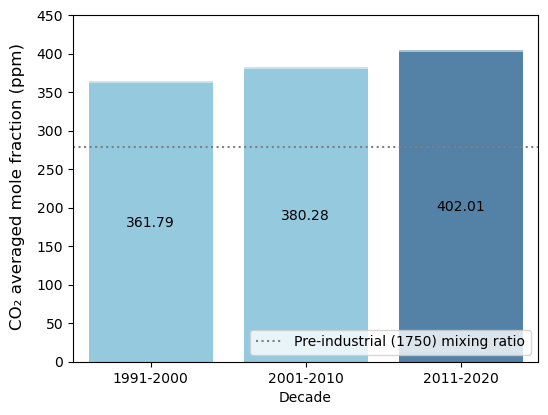

In [89]:
# Create the figure
fig, ax = plt.subplots(nrows=1, figsize = (6,4.5))

# Add the bars 
ax = sns.barplot(df_mol_co2_drop_1750,
                x="CO2",
                y="averaged mole fraction",
                palette = ["skyblue","skyblue","steelblue"])

# Add bars labels
for i in ax.containers:
    plt.bar_label(i, label_type='center')

# Add the uncertainty bars 
ax = sns.barplot(df_mol_co2_drop_1750,
                x="CO2",
                y="max mole",
                palette = ["skyblue","skyblue","steelblue"],
                alpha=0.5)
plt.xlabel("Decade")
ax.set(ylabel=None)
fig.supylabel(u'CO\u2082 ' + "averaged mole fraction (ppm)")
ax.set_ylim(0, 450)
plt.axhline(mole_fract_1750_co2, color="gray", ls='dotted', label='Pre-industrial (1750) mixing ratio')
plt.legend(loc= 'lower right')
plt.subplots_adjust(hspace=.0)
fig.show()

# Save the figures 
fig.savefig('figures/Figure_01_CO2 mol fraction.jpg', format='jpg')
fig.savefig('figures/Figure_01_CO2 mol fraction.eps', format='eps')

## Figure 2 : Decadal averaged mole fraction in parts per million (ppm) of methane (CH4) from 1991-2020.
Caption : : Decadal averaged mole fraction in parts per billion (ppb) of methane (CH4) from 1991-2020. Pre-industrial levels indicated in red dashed line. Source: WMO. <br> <br>
Display the graph

C:\Users\BenjaminPire\AppData\Local\Temp\ipykernel_12372\1451536275.py:27: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


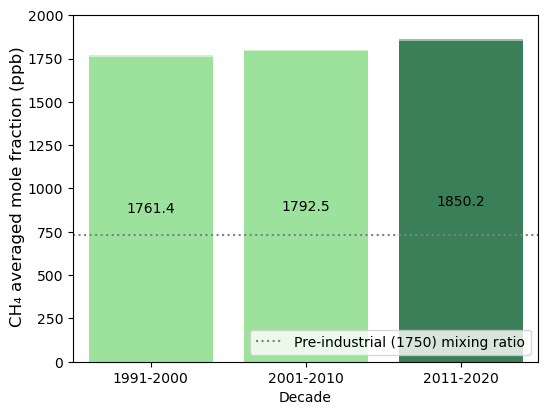

In [90]:
# Create the figure
fig, ax = plt.subplots(nrows=1, figsize = (6,4.5))

# Add the bars 
ax = sns.barplot(df_mol_ch4_drop_1750,
                x="CH4", 
                y="averaged mole fraction", 
                palette = ["lightgreen","lightgreen","seagreen"])

# Add bars labels
for i in ax.containers:
    plt.bar_label(i, label_type='center')

# Add the uncertainty bars 
ax = sns.barplot(df_mol_ch4_drop_1750,
                x="CH4", 
                y="max mole", 
                palette = ["lightgreen","lightgreen","seagreen"], 
                alpha=0.5)
plt.xlabel("Decade")
ax.set(ylabel=None)
fig.supylabel(u'CH\u2084 ' + "averaged mole fraction (ppb)")
ax.set_ylim(0, 2000)
plt.axhline(mole_fract_1750_ch4, color="gray", ls='dotted', label='Pre-industrial (1750) mixing ratio')
plt.legend(loc= 'lower right')
plt.subplots_adjust(hspace=.0)
fig.show() 


# Save the figures 
fig.savefig('figures/Figure_02_CH4 mol fraction.jpg', format='jpg')
fig.savefig('figures/Figure_02_CH4 mol fraction.eps', format='eps')

## Figure 3 : Decadal averaged mole fraction in parts per billion (ppb) of nitrous oxide (N2O) from 1991-2020. 
Caption : Decadal averaged mole fraction in parts per billion (ppb) of nitrous oxide (N2O) from 1991-2020. Pre-industrial levels indicated in red dashed line. Source: WMO. <br> <br>
Display the graph


C:\Users\BenjaminPire\AppData\Local\Temp\ipykernel_12372\2129252043.py:27: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


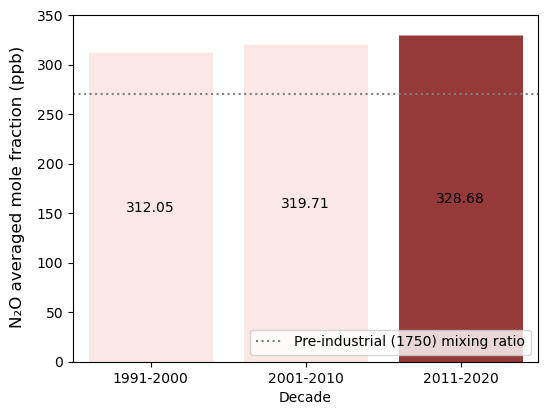

In [91]:
# Create the figure
fig, ax = plt.subplots(nrows=1, figsize = (6,4.5))

# Add the bars 
ax = sns.barplot(df_mol_n2o_drop_1750,
                x="N2O", 
                y="averaged mole fraction", 
                palette = ["mistyrose","mistyrose","brown"])

# Add bars labels
for i in ax.containers:
    plt.bar_label(i, label_type='center')

# Add the uncertainty bars 
ax = sns.barplot(df_mol_n2o_drop_1750,
                x="N2O", 
                y="max mole", 
                palette = ["mistyrose","mistyrose","brown"], 
                alpha=0.5)
plt.xlabel("Decade")
ax.set(ylabel=None)
fig.supylabel(u'N\u2082O ' + "averaged mole fraction (ppb)")
ax.set_ylim(0, 350)
plt.axhline(mole_fract_1750_n2o, color="gray", ls='dotted', label='Pre-industrial (1750) mixing ratio')
plt.legend(loc= 'lower right')
plt.subplots_adjust(hspace=.0)
fig.show()

# Save the figures 
fig.savefig('figures/Figure_03_N2O mol fraction.jpg', format='jpg')
fig.savefig('figures/Figure_03_N2O mol fraction.eps', format='eps')

***
# figure 8 : National highest temperature by decade <a id="8"></a>

Caption : Percentage of reporting countries that recorded their highest temperature of the 1961-2020 period during the decade (2011-2020)

## Cleaning

1. Extract the data

In [92]:
df_nat_dec = pd.read_csv("data/figure-08/Figure-08-source data-National extremes by decade.csv") 

2. Adapt the dataframe

In [93]:
df_nat_dec_trans = df_nat_dec.transpose()
df_nat_dec_cleaned = df_nat_dec_trans.set_axis(df_nat_dec_trans.loc["1"], axis='columns').drop("1")

df_nat_dec_cleaned['Total'] = df_nat_dec_cleaned['Total'].astype(float)

3. Calculate the percentage of reporting countries that recorded their highest temperature

In [94]:
df_nat_high_temp_dec_cleaned = df_nat_dec_cleaned.loc[(df_nat_dec_cleaned["Mesure"] == "High temp"), ["Mesure", "Decade", "Total"]]
df_nat_high_temp_dec_cleaned["total percent"] = ((df_nat_high_temp_dec_cleaned["Total"]/96)*100).round(decimals=0)
df_nat_high_temp_dec_cleaned

1,Mesure,Decade,Total,total percent
8,High temp,1961-1970,3.83,4.0
9,High temp,1971-1980,10.50,11.0
10,High temp,1981-1990,6.50,7.0
11,High temp,1991-2000,15.83,16.0
12,High temp,2001-2010,21.50,22.0
13,High temp,2011-2020,37.84,39.0


4. Display the graph

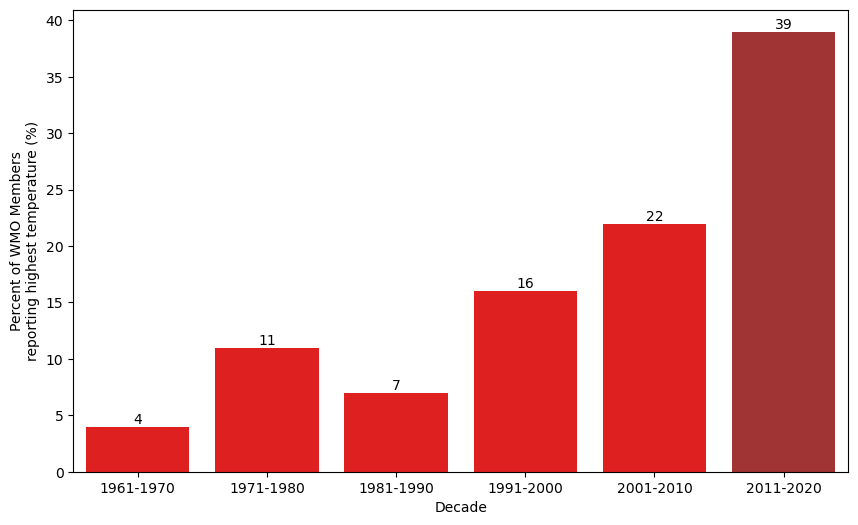

In [95]:
fig = plt.figure(figsize = (10,6))
ax = sns.barplot(df_nat_high_temp_dec_cleaned,
                x="Decade", 
                y="total percent", 
                palette = ["r","r","r","r","r","firebrick"])
plt.xlabel("Decade")
plt.ylabel("Percent of WMO Members\nreporting highest temperature (%)")
plt.setp(ax.get_yticklabels(), ha="right",
         rotation_mode="anchor")

for i in ax.containers:
    plt.bar_label(i)

plt.show()


fig.savefig('figures/Figure_08_data-National extremes by decade.eps', format='eps')
fig.savefig('figures/Figure_08_data-National extremes by decade.png', format='png')


***
# figure 9 : Ocean Heat Content (OHC) <a id="9"></a>

Caption : The 1960-2020 ensemble mean by decade (top) and time series and ensemble standard deviation (2-sigma, shaded) of global ocean heat content anomalies relative to the 2005-2017 climatology for the 0-300m (grey), 0-700m (blue), 0-2000m (yellow) and 700-2000m depth layer (green) 

## Cleaning

1. Extract the data

In [96]:
df_glob_ohc = pd.read_csv("data/figure-9/global_OHC_60N60S_mean_spread_1960-2020_Jm2.csv")


2. Adapt the dataframe

In [97]:
df_glob_ohc["time_as_date"] = pd.to_datetime(df_glob_ohc["time"], 
                                             unit='D',
                                             origin=pd.Timestamp('1950-01-01'))
df_glob_ohc

,time,ohc_mean_0-300m,ohc_std_0-300m,ohc_mean_0-700m,ohc_std_0-700m,ohc_mean_0-2000m,ohc_std_0-2000m,ohc_mean_700-2000m,ohc_std_700-2000m,time_as_date
0,3833,-322379070.0,25621004.0,-510292100.0,34104328.0,-782375940.0,38814304.0,-273208640.0,31589004.0,1960-06-30
1,4198,-297629280.0,52828300.0,-481744900.0,50511628.0,-731982720.0,38691792.0,-253750690.0,50015272.0,1961-06-30
2,4563,-252260430.0,64864804.0,-425027550.0,85701008.0,-691054980.0,26451982.0,-244804450.0,40641668.0,1962-06-30
3,4928,-285635940.0,39138872.0,-466175680.0,47256876.0,-715564290.0,23186180.0,-267147060.0,24291084.0,1963-06-30
4,5294,-359340540.0,37740916.0,-507010210.0,57110888.0,-752094140.0,64937196.0,-244875550.0,26830552.0,1964-06-30
...,...,...,...,...,...,...,...,...,...,...
56,24287,26926868.0,13450965.0,34438152.0,20600632.0,75282432.0,19280790.0,44536912.0,9944348.0,2016-06-30
57,24652,55643436.0,7112409.5,84927432.0,11570425.0,144894340.0,19365226.0,64044172.0,11584846.0,2017-06-30
58,25017,77594000.0,9604144.0,118205600.0,15855643.0,177100190.0,28568526.0,58503892.0,12833534.0,2018-06-30
59,25382,103463320.0,10996561.0,154117710.0,17400038.0,226295360.0,25710422.0,74563744.0,11455316.0,2019-06-30


3. Create a dictionary with all the parameters

In [98]:
dict_glob_ohc = {
    "time_labels" : ["1961\n-1970","1971\n-1980","1981\n-1990","1991\n-2000","2001\n-2010","2011\n-2020"],
    "legend_labels" : ["0-300m","0-700m","0-2000m","700-2000m"],
    "values" : ["ohc_mean_0-300m", "ohc_mean_0-700m", "ohc_mean_0-2000m", "ohc_mean_700-2000m"],
    "uncertainty" : ["ohc_std_0-300m", "ohc_std_0-700m", "ohc_std_0-2000m", "ohc_std_700-2000m"],
    "colors" : ["gray","steelblue","orange","g"],
    "colors_rgb" : ["rgb(128,128,128)","rgb(70,130,180)","rgb(255,164,0)","rgb(0,128,0)"],
    "colors_rgba" : ["rgba(128,128,128,0.3)","rgba(70,130,180,0.7)","rgba(255,164,0,0.3)","rgba(0,128,0,0.3)"]
}


4. Create a function that get the decadal average

In [99]:
def get_mean_values(df_glob_ohc):
    # Calculate the decade mean 
    decade_mean_list = list()
    decade_mean_rebased_list = list()
    decade_mean_roc_list = list()
    begin = 3832.0
    list_of_col_to_process = ["ohc_mean_0-300m", "ohc_mean_0-700m", "ohc_mean_0-2000m", "ohc_mean_700-2000m"]
    for i in range(6):
        decade_mean_list.append([df_glob_ohc.loc[df_glob_ohc["time"].between(begin + 365*10*i,
                                                                             begin + 365*10*(i+1)),
                                                 col_to_process].mean() for col_to_process in list_of_col_to_process])

        decade_mean_rebased_list.append([(decade_mean_list[0][0] - decade_mean_list[0][n]) for n in range(4)])
        
        if (len(decade_mean_list) == 1):
            decade_mean_roc_list.append([(decade_mean_list[0][0] - decade_mean_list[0][n]) for n in range(4)])

        else :
            decade_mean_roc_list.append([(decade_mean_list[i][n] - decade_mean_list[i-1][n]) for n in range(4)])
    decade_mean_list = list(map(list, zip(*decade_mean_list)))
    return (decade_mean_list)

5. Create a function that display the graph  

In [100]:
def plot_glob_ohc(decade_list):
    # Create a figure
    fig, axes = plt.subplots(2,figsize=(7,5),height_ratios=(1,3))
    
    dict_glob_ohc = {
        "time_labels" : ["1961\n-1970","1971\n-1980","1981\n-1990","1991\n-2000","2001\n-2010","2011\n-2020"],
        "legend_labels" : ["0-300m","0-700m","0-2000m","700-2000m"],
        "values" : ["ohc_mean_0-300m", "ohc_mean_0-700m", "ohc_mean_0-2000m", "ohc_mean_700-2000m"],
        "uncertainty" : ["ohc_std_0-300m", "ohc_std_0-700m", "ohc_std_0-2000m", "ohc_std_700-2000m"],
        "colors" : ["gray","steelblue","orange","g"]
    }

    #create the curves
    for n in range(len(dict_glob_ohc["legend_labels"])):
        # Display the yearly chart
        sns.lineplot(data=df_glob_ohc,
                     label=dict_glob_ohc["legend_labels"][n],
                     x="time_as_date",
                     y=dict_glob_ohc["values"][n],
                     color= dict_glob_ohc["colors"][n],
                     ax=axes[1])
        
        # Display the uncertaincy fillin
        axes[1].fill_between(df_glob_ohc['time_as_date'],
                         df_glob_ohc[dict_glob_ohc["values"][n]] - 2*df_glob_ohc[dict_glob_ohc["uncertainty"][n]],
                         df_glob_ohc[dict_glob_ohc["values"][n]] + 2*df_glob_ohc[dict_glob_ohc["uncertainty"][n]],
                         alpha=0.3, color = dict_glob_ohc["colors"][n])  # Adjust the transparency as needed

        # Display the decadal chart
        for j,value in enumerate(decade_list[n]):
            axes[0].hlines(y=value, xmin=1960+10*j, xmax=1970+10*j, linewidth=1, color=dict_glob_ohc["colors"][n])

    # Other configurations 
    plt.ylabel(r"Ocean heat content (OHC) (J$m^{-2}$)")
    plt.xlabel("Year")
    axes[0].xaxis.set_ticks_position('top')
    
    axes[0].xaxis.set_ticks_position('top')
    axes[0].xaxis.set_label_position('top')
    desired_years = range(1965, 2022, 10)  # Adjust as needed
    axes[0].set(xticks=desired_years, 
                xticklabels=dict_glob_ohc["time_labels"], 
                xlabel="Decade", xlim=(1957, 2023))
    axes[1].legend(title='Depth', loc="lower right")
    plt.grid(alpha=0.5)
    plt.subplots_adjust(hspace=.0)
    
    # Save the files  
    fig.savefig('figures/Figure_09_Ocean heat content.png', format='png')
    fig.savefig('figures/Figure_09_Ocean heat content.pdf', format='pdf')


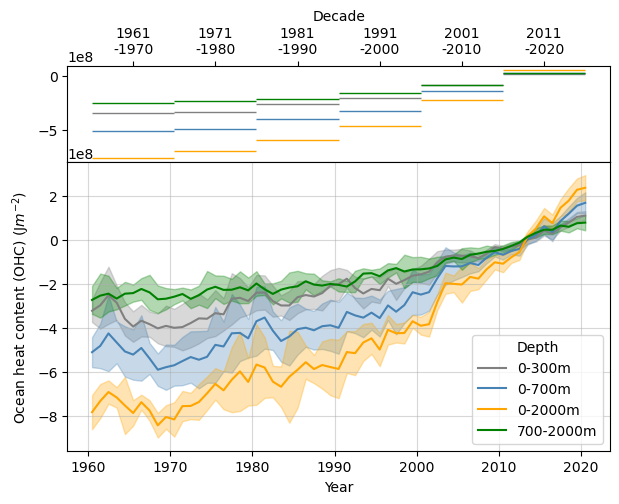

In [101]:
list_dec_glob_ohc = get_mean_values(df_glob_ohc)
plot_glob_ohc(list_dec_glob_ohc)

## Interactive solution <a id="9_inter"></a>

1. Create a function that make the traces of the graph

In [102]:
def create_glob_ohc_interact_traces(decade) :
    frame_list = list()
    
    for n in range(len(dict_glob_ohc["legend_labels"])):
        # Uncertainty 
        
        uncert_trc = go.Scatter(
            name=dict_glob_ohc["legend_labels"][n],
            x=df_glob_ohc["time_as_date"][:10*decade+10],
            y=df_glob_ohc[dict_glob_ohc["values"][n]][:10*decade+10]+2*df_glob_ohc[dict_glob_ohc["uncertainty"][n]][:10*decade+10],
            mode='lines',
            marker=dict(color=dict_glob_ohc["colors_rgba"][n]),
            line=dict(width=0),
            legendgroup=dict_glob_ohc["legend_labels"][n],
            showlegend=False,
             hoverinfo='none')
        uncert_fill_trc = go.Scatter(
            name=dict_glob_ohc["legend_labels"][n],
            x=df_glob_ohc["time_as_date"][:10*decade+10],
            y=df_glob_ohc[dict_glob_ohc["values"][n]][:10*decade+10]-2*df_glob_ohc[dict_glob_ohc["uncertainty"][n]][:10*decade+10],
            marker=dict(color=dict_glob_ohc["colors_rgba"][n]),
            line=dict(width=0),
            mode='lines',
            fillcolor=dict_glob_ohc["colors_rgba"][n],
            fill='tonexty',
            legendgroup=dict_glob_ohc["legend_labels"][n],
            showlegend=False,
             hoverinfo='none')

        # curve
        crv_trc = go.Line(name=dict_glob_ohc["legend_labels"][n],
                        x=df_glob_ohc["time_as_date"][:10*decade+10], 
                        y=df_glob_ohc[dict_glob_ohc["values"][n]][:10*decade+10], 
                        legendgroup=dict_glob_ohc["legend_labels"][n],
                        marker=dict(color=dict_glob_ohc["colors_rgb"][n]))


        
        # Decadal average value
        dec_aver_trc = go.Bar(name=dict_glob_ohc["legend_labels"][n],
                              x=dict_glob_ohc["time_labels"][:decade+1], 
                              y=list_dec_glob_ohc[n][:decade+1],
                              legendgroup=dict_glob_ohc["legend_labels"][n],
                              marker=dict(color=dict_glob_ohc["colors_rgba"][n]),
                              showlegend=False)
        frame_list.append([uncert_trc, uncert_fill_trc, crv_trc , dec_aver_trc])
    
    
    return (frame_list)

2. Create a function that display the interactive graph  

In [103]:
def plot_glob_ohc_interact():
    fig = make_subplots(rows=2, cols=1, row_heights =[0.3, 0.7])

    frame_list = create_glob_ohc_interact_traces(6)    
    # Add traces to the figure
    for i in range(len(frame_list)):
        fig.add_trace(frame_list[i][0], row=2, col=1)
        fig.add_trace(frame_list[i][1], row=2, col=1)
        fig.add_trace(frame_list[i][2], row=2, col=1)
        fig.add_trace(frame_list[i][3], row=1, col=1)

        
    fig.update_layout(height=600, width=800,
                      title_text="Ocean heat content (OHC) (Jm\u207B\u00B2)",
                      legend=dict(yanchor="bottom", y=0.01, xanchor="left", x=0.81),
                      dragmode=False,
                      modebar_remove=plotly_config,
                      )
        # Apply the same yaxis formatting to both subplots
    for i in range(2):
        fig.update_yaxes(exponentformat="e", row=i+1, col=1)

    fig.show()
    # Save the graph 
    py.plot(fig, filename= "Ocean heat content (OHC)", auto_open=False)

In [104]:
plot_glob_ohc_interact()

C:\Users\BenjaminPire\anaconda3\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




## GIF solution <a id="9_gif"></a>

This animated image has been used for the official publications on Linkedin and X. <br><br>
Linkedin:https://www.linkedin.com/posts/world-meteorological-organization_did-you-know-that-the-ocean-absorbs-90-activity-7138384201690652672-kck8?utm_source=share&utm_medium=member_desktop <br>


<img src="figures/animations/Figure_09_Ocean heat content.gif" width="750" align="center">


1. Create a function that save an animation gif graph  

In [105]:
def save_glob_ohc_gif(): 
    #create the folder if it deosn't already exist
    pic_list = []
    for n in range(6):
        fig = make_subplots(rows=2, cols=1, row_heights =[0.3, 0.7])

        frame_list = create_glob_ohc_interact_traces(n)    
        # Add traces to the figure
        for i in range(len(frame_list)):
            fig.add_trace(frame_list[i][0], row=2, col=1)
            fig.add_trace(frame_list[i][1], row=2, col=1)
            fig.add_trace(frame_list[i][2], row=2, col=1)
            fig.add_trace(frame_list[i][3], row=1, col=1)

        fig.update_layout(height=600, width=800,
                          title_text="Ocean heat content (OHC) (Jm\u207B\u00B2)",
                          legend=dict(yanchor="bottom", y=0.01, xanchor="left", x=0.81),
                          dragmode=False,
                          modebar_remove=plotly_config,
                          )
            # Apply the same yaxis formatting to both subplots
        for i in range(2):
            fig.update_yaxes(exponentformat="e", row=i+1, col=1)
        
        pic_frame = PIL.Image.open(io.BytesIO(fig.to_image(format="png")))
        pic_list.append(pic_frame)
    for i in range(8):
        pic_list.append(pic_frame)
        
    frame_one = pic_list[0]
    print(frame_one)
    frame_one.save("./figures/animations/Figure_09_Ocean heat content.gif", 
                    format="GIF", 
                    append_images=pic_list,
                    save_all=True, 
                    duration=500, loop=0)



In [106]:
save_glob_ohc_gif()

<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=800x600 at 0x1C5C44E8F90>


***
# figure 11 : Evolution of the global mean sea level and Interannual variability <a id="11"></a>

Caption : (Left) Evolution of the global mean sea level measured by satellite altimetry since 1993 (red curve). The shaded area represents the 90% level uncertainty, and the black line is a quadratic fit to the data. 

(Right) Interannual variability of the GMSL (blue curve) and multivariate ENSO index (red curve)


## Right figure  : Interannual variability


## Cleaning

1. Extract the data

In [107]:
corr_gmslei = pd.read_csv("data/figure-11/corr_GMSLMEI_data.csv") 

2. Adapt the dataframe

In [108]:
df_corr_gmslei = pd.DataFrame(corr_gmslei.values, columns=corr_gmslei.columns)
df_corr_gmslei["time"] = pd.to_datetime(df_corr_gmslei["time"], format="%Y-%m-%d")
df_corr_gmslei = df_corr_gmslei.rename( columns = {"mei" : "Multivariate ENSO",
                                                  "msl_tpa_corr_filt_dtrd" : "GMSL"})
df_corr_gmslei["Multivariate ENSO"] = df_corr_gmslei["Multivariate ENSO"] * 10
df_corr_gmslei["GMSL"] = df_corr_gmslei["GMSL"] * 10

In [109]:
df_corr_gmslei_melt = pd.melt(df_corr_gmslei, 
                              id_vars=["time"]).rename( columns = {"variable" : "Index"})
df_corr_gmslei_melt

,time,Index,value
0,1993-01-31,GMSL,-5.700226
1,1993-02-28,GMSL,-2.872415
2,1993-03-31,GMSL,-1.138998
3,1993-04-30,GMSL,0.484122
4,1993-05-31,GMSL,0.67311
...,...,...,...
691,2021-08-31,Multivariate ENSO,-2.7
692,2021-09-30,Multivariate ENSO,-2.9
693,2021-10-31,Multivariate ENSO,-3.0
694,2021-11-30,Multivariate ENSO,-2.86


3. Display the graph

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


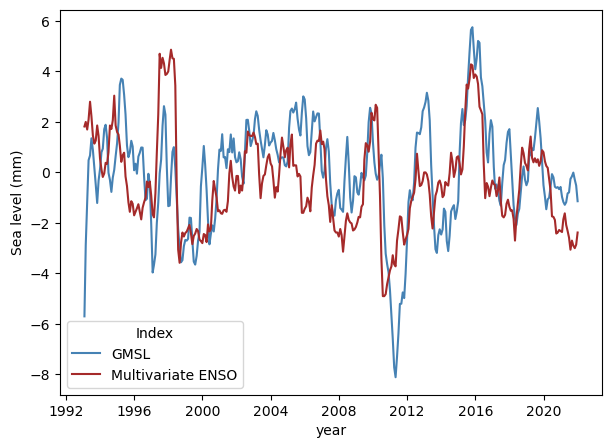

In [110]:
fig, ax3 = plt.subplots(figsize=(7,5))

sns.lineplot(data=df_corr_gmslei_melt,
             x="time",
             y="value",
             hue="Index",
             palette= ["steelblue","brown"], ax=ax3)
ax3.set_ylabel("Sea level (mm)")
ax3.set_xlabel("year")
fig.savefig('figures/Figure_11_Interannual variability.eps', format='eps')
fig.savefig('figures/Figure_11_Interannual variability.png', format='png')


## Left figure : Evolution of the global mean sea level

## Cleaning

1. Extraction of the data

In [111]:
df_repro_gmsl = pd.read_csv("data/figure-11/reprocessed_gmsl_data.csv") 

2. Reshaping the date format

In [112]:
df_repro_gmsl["time"] = pd.to_datetime(df_repro_gmsl["time"], format="%Y-%m-%d")
type(df_repro_gmsl["time"][0])

pandas._libs.tslibs.timestamps.Timestamp

3. Calculate the decade mean

In [113]:
decade_mean_1 = df_repro_gmsl.loc[df_repro_gmsl["time"].dt.date.between(dt.date(1092, 1, 1),
                                                             dt.date(2001, 1, 1)),
                                  "msl_tpa_corr_filt"].mean()
decade_mean_2 = df_repro_gmsl.loc[df_repro_gmsl["time"].dt.date.between(dt.date(2001, 1, 1),
                                                             dt.date(2011, 1, 1)),
                                  "msl_tpa_corr_filt"].mean()
decade_mean_3 = df_repro_gmsl.loc[df_repro_gmsl["time"].dt.date.between(dt.date(2011, 1, 1),
                                                             dt.date(2021, 1, 1)),
                                  "msl_tpa_corr_filt"].mean()


df_repro_gmsl["time"] = pd.to_datetime(df_repro_gmsl["time"], format="%Y-%m-%d")
for i, date in enumerate(df_repro_gmsl["time"]):
    df_repro_gmsl["time"][i] = date.date()


df_gmsl_decade_mean = pd.DataFrame(data={'Decade': ["1993-2000", "2001-2010", "2011-2020"], 
                                         'msl_tpa_corr_filt': [decade_mean_1,decade_mean_2,decade_mean_3]})
df_gmsl_decade_mean



C:\Users\BenjaminPire\AppData\Local\Temp\ipykernel_12372\2209959370.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Decade,msl_tpa_corr_filt
0,1993-2000,12.716280
1,2001-2010,37.345218
2,2011-2020,74.032541


4. Create a function that display the graph  

In [114]:
def plot_repro_gmsl():
    fig, axes = plt.subplots(2,figsize=(7,5),height_ratios=(1,3))
    
    # label
    time_labels = ["1993\n-2000","2001\n-2010","2011\n-2020"]
    plt.xlabel("Year")
    plt.ylabel("Global mean sea level (mm)")
    
    # Axes 0 bar chart
    time_decade = [1995,2005,2015]
    
    axes[0].bar(time_decade , 
                 df_gmsl_decade_mean["msl_tpa_corr_filt"],
                  width=9,
                  alpha=1,
                  color = "lightblue",
                  label='Decadal average value')
    #axes[0].axhline(y=0, color='black', label='axvline - full height')

    # Axes 0 
    axes[0].xaxis.set_ticks_position('top')
    axes[0].xaxis.set_label_position('top')
    desired_years = range(1995, 2022, 10)  # Adjust as needed
    axes[0].set_xticks(desired_years)
    axes[0].set_xticklabels(time_labels)
    axes[0].set_xlabel("Decade")
    axes[0].set_xlim(1989, 2021)
    
    # Axes 1 line chart
    sns.lineplot(data=df_repro_gmsl,
                 x = "time",
                 y = "msl_tpa_corr_filt",
                 label = "Global mean sea level",
                 color = "steelblue", ax=axes[1])
    sns.lineplot(data=df_repro_gmsl,
                 x = "time",
                 y = "quad_trd_values",
                 color = "black",
                 label = "Trend : 3.29 \u00b1 0.33 mm/yr\nAcceleration : 0.11 \u00b1 0.06 mm/yr\u00b2",
                 alpha = 0.8, 
                 ax=axes[1])

    axes[1].fill_between(df_repro_gmsl['time'],
                     df_repro_gmsl['msl_tpa_corr_filt'].astype(np.float64) - df_repro_gmsl['msl_uncertainty'].astype(np.float64),
                     df_repro_gmsl['msl_tpa_corr_filt'].astype(np.float64) + df_repro_gmsl['msl_uncertainty'].astype(np.float64),
                     alpha = 0.5, color = ["lightblue"])  # Adjust the transparency as needed
    axes[0].legend()
    plt.legend()
    plt.grid()
    plt.subplots_adjust(hspace=.0)
    fig.savefig('figures/Figure_11_global mean sea level.pdf', format='pdf')
    fig.savefig('figures/Figure_11_global mean sea level.png', format='png')

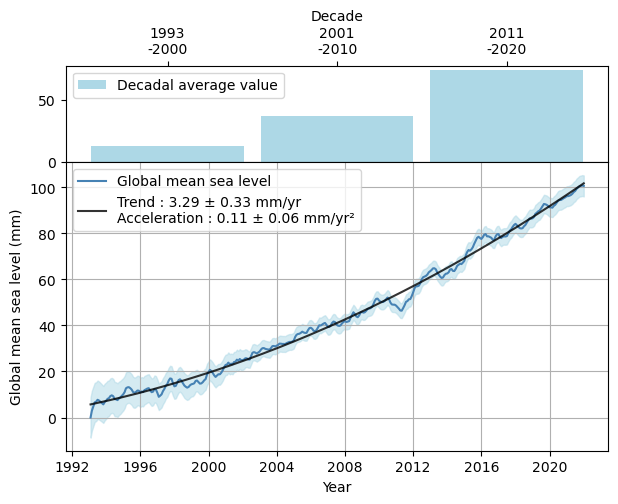

In [115]:
plot_repro_gmsl()

## Interactive solution <a id="11_inter"></a>

1. Create a function that make the traces of the graph

In [116]:
def create_repro_gmsl_interact_traces(year) :
    
    # Create traces
    uncertainty_trace = go.Scatter(
        name='Uncertainty',
        x=df_repro_gmsl["time"][:12*year+1],
        y=df_repro_gmsl["msl_tpa_corr_filt"][:12*year+1] + df_repro_gmsl['msl_uncertainty'][:12*year+1],
        mode='lines',
        marker=dict(color="rgba(173,216,230,0.7)"),
        line=dict(width=0),
        legendgroup='Global mean sea level',
        showlegend=False,
        hoverinfo='none'
    )

    uncertainty_fill_trace = go.Scatter(
        name='Uncertainty',
        x=df_repro_gmsl["time"][:12*year+1],
        y=df_repro_gmsl["msl_tpa_corr_filt"][:12*year+1]-df_repro_gmsl['msl_uncertainty'][:12*year+1],
        mode='lines',
        marker=dict(color="rgba(173,216,230,0.7)"),
        line=dict(width=0),
        fill='tonexty',
        fillcolor='rgba(173,216,230,0.7)',
        legendgroup='Global mean sea level',
        showlegend=False,
        hoverinfo='none'
    )

    sea_rise_curve_trace = go.Line(
        name='Global mean sea level (mm)',
        x=df_repro_gmsl["time"][:12*year+1],
        y=df_repro_gmsl["msl_tpa_corr_filt"][:12*year+1],
        legendgroup='Global mean sea level',
        marker=dict(color="rgb(75,169,200)"
    ))

    moving_average_trace = go.Line(
        name='Moving Average',
        x=df_repro_gmsl["time"][:12*year],
        y=df_repro_gmsl["quad_trd_values"][:12*year+1],
        marker=dict(color="rgba(0,0,0,0.7)")
    )
    initial_y_values = [0] * len(df_gmsl_decade_mean["Decade"])

    decadal_average_trace = go.Bar(
        name='Decadal average sea level (mm)',
        x=df_gmsl_decade_mean["Decade"],
        y=initial_y_values,
        marker=dict(color='rgba(173,216,230,0.7)')
    )
    
    for decade in range(3):
        if df_repro_gmsl["time"][12*year+1] >= dt.date(2000+10*decade, 1, 1):
            # Update y values for the specific frame
            initial_y_values[decade] = df_gmsl_decade_mean["msl_tpa_corr_filt"][decade]
            decadal_average_trace.y = initial_y_values

    return(uncertainty_trace, 
           uncertainty_fill_trace, 
           sea_rise_curve_trace, 
           moving_average_trace, 
           decadal_average_trace)


2. Create a function that display the interactive graph  

In [117]:
def plot_repro_gmsl_interact(): 
    fig = make_subplots(rows=2, cols=1, row_heights =[0.3, 0.7])
    uncert_trc, uncert_fill_trc, crv_trc , mvg_aver_trc, dec_aver_trc = create_repro_gmsl_interact_traces(28)
    
    # Add traces to the figure
    fig.add_trace(uncert_trc, row=2, col=1)
    fig.add_trace(uncert_fill_trc, row=2, col=1)
    fig.add_trace(crv_trc, row=2, col=1)
    fig.add_trace(mvg_aver_trc, row=2, col=1)
    fig.add_trace(dec_aver_trc, row=1, col=1)

    fig.update_layout(height=600, width=800, 
                      title_text="Global mean sea level (mm)",
                      legend=dict(yanchor="top", y=0.55, xanchor="left", x=0.01),
                      dragmode=False,
                      modebar_remove=plotly_config) 
    fig.show()
    py.plot(fig, filename= "global mean sea level", auto_open=False)


In [118]:
plot_repro_gmsl_interact()

C:\Users\BenjaminPire\anaconda3\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




## GIF solution <a id="11_gif"></a>
This animated image has been used for the official publications on Linkedin and X. <br><br>
Linkedin: https://www.linkedin.com/feed/update/urn:li:activity:7138116216551796737 <br>
X : https://x.com/WMO/status/1732350933995016437?s=20 <br>

<img src="figures/animations/Figure_11_global mean sea level.gif" width="750" align="center">


1. Create a function that save an animation gif graph

In [119]:
def save_repro_gmsl_gif(): 
    pic_list = []
    for n in range(2,28):
        uncert_trc, uncert_fill_trc, crv_trc , mvg_aver_trc, dec_aver_trc = create_repro_gmsl_interact_traces(n)
        fig = make_subplots(rows=2, cols=1, row_heights =[0.3, 0.7])    
        fig.update_layout(height=600, width=800, 
                          title_text="Global mean sea level (mm)",
                          legend=dict(yanchor="top", y=0.55, xanchor="left", x=0.01),
                          dragmode=False,
                          modebar_remove=plotly_config)
        fig.add_trace(uncert_trc, row=2, col=1)
        fig.add_trace(uncert_fill_trc, row=2, col=1)
        fig.add_trace(crv_trc, row=2, col=1)
        fig.add_trace(mvg_aver_trc, row=2, col=1)
        fig.add_trace(dec_aver_trc, row=1, col=1)
        
        pic_frame = PIL.Image.open(io.BytesIO(fig.to_image(format="png")))
        pic_list.append(pic_frame)
    for i in range(8):
        pic_list.append(pic_frame)
        
    frame_one = pic_list[0]
    print(frame_one)
    frame_one.save("figures/animations/Figure_11_global mean sea level.gif", 
                    format="GIF", 
                    append_images=pic_list,
                    save_all=True, 
                    duration=500, loop=0)


In [120]:
save_repro_gmsl_gif()

<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=800x600 at 0x1C5C448AAD0>


***
# Figure 14 : Global annual mass change of reference glaciers (left) <a id="14"></a>

Caption : (Left) Annual and decadal mass changes of reference glaciers with more than 30 years of ongoing glaciological measurements.

## Cleaning

1. Extract the data


In [121]:
df_glob_mass_glac = pd.read_csv("data/figure-14/Figure 14 Global annual mass change of reference glaciers (left).csv") 

2. Adapt the dataframe

In [122]:
df_glob_an_mass_glac = df_glob_mass_glac.loc[:,("Year","Annual Mass Change in m.w.e")]
df_glob_an_mass_glac = df_glob_an_mass_glac.drop([0,71,72]).reset_index(drop=True)

3. Create a dataframe of the decadal averages

In [123]:
df_glob_dec_mass_glac = df_glob_mass_glac.loc[~df_glob_mass_glac["Decadal Averages"].isna(),("Year","Decadal Averages")]
df_glob_dec_mass_glac["Year"] = [1955,1965,1975,1985,1995,2005,2015]
df_glob_dec_mass_glac["Decade"] = ["1951-1960",
                                   "1961-1970",
                                   "1971-1980",
                                   "1981-1990",
                                   "1991-2000",
                                   "2001-2010",
                                   "2011-2020"]
df_glob_dec_mass_glac

,Year,Decadal Averages,Decade
10,1955,-0.3544,1951-1960
20,1965,-0.1454,1961-1970
30,1975,-0.2330,1971-1980
40,1985,-0.2553,1981-1990
50,1995,-0.4673,1991-2000
60,2005,-0.5790,2001-2010
70,2015,-0.9390,2011-2020


4. Create columns that give the color of the bar depending on the positives or negative value. 

In [124]:
df_glob_an_mass_glac["color"]=df_glob_an_mass_glac["Year"]
df_glob_an_mass_glac["color_rgb"]=df_glob_an_mass_glac["Year"]

for i in range(0,len(df_glob_an_mass_glac["Year"])):
    if df_glob_an_mass_glac["Annual Mass Change in m.w.e"][i]>0:
        df_glob_an_mass_glac["color"][i] ='steelblue' 
        df_glob_an_mass_glac["color_rgb"][i] ='rgb(70,130,180)' 
    else:
        df_glob_an_mass_glac["color"][i] ='brown' 
        df_glob_an_mass_glac["color_rgb"][i] ='rgb(165,42,42)' 
df_glob_an_mass_glac

C:\Users\BenjaminPire\AppData\Local\Temp\ipykernel_12372\399720102.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\BenjaminPire\AppData\Local\Temp\ipykernel_12372\399720102.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Annual Mass Change in m.w.e,color,color_rgb
0,1951,-0.345,brown,"rgb(165,42,42)"
1,1952,-0.561,brown,"rgb(165,42,42)"
2,1953,-0.557,brown,"rgb(165,42,42)"
3,1954,-0.414,brown,"rgb(165,42,42)"
4,1955,0.377,steelblue,"rgb(70,130,180)"
...,...,...,...,...
65,2016,-0.967,brown,"rgb(165,42,42)"
66,2017,-0.756,brown,"rgb(165,42,42)"
67,2018,-1.174,brown,"rgb(165,42,42)"
68,2019,-1.207,brown,"rgb(165,42,42)"


5. Display the graph

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


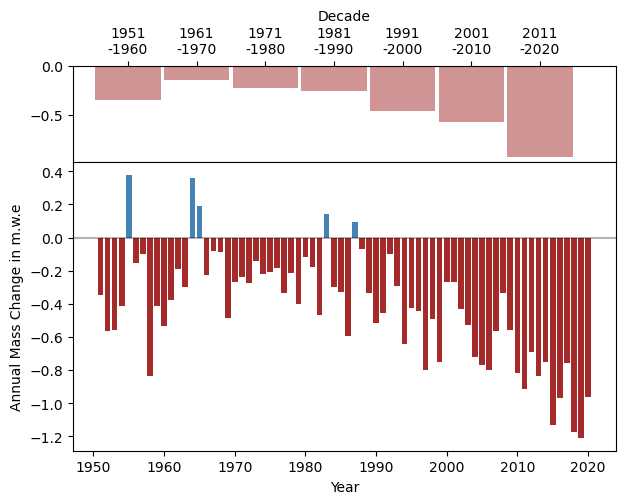

In [125]:
fig, axes = plt.subplots(2,figsize=(7,5),height_ratios=(1,3))
plt.xlabel("Year")
plt.ylabel("Annual Mass Change in m.w.e")

axes[1].bar(df_glob_an_mass_glac["Year"], 
       df_glob_an_mass_glac["Annual Mass Change in m.w.e"],
       color = df_glob_an_mass_glac["color"])




axes[0].bar(df_glob_dec_mass_glac["Year"], 
       df_glob_dec_mass_glac["Decadal Averages"],
       width=9.5,
       alpha=0.5,
       color = "brown")

plt.subplots_adjust(hspace=.0)
axes[0].xaxis.set_ticks_position('top')
axes[0].xaxis.set_label_position('top')

desired_years = range(1955, 2022, 10)  # Adjust as needed
axes[0].set_xticks(desired_years)
axes[0].set_xticklabels(["1951\n-1960",
                         "1961\n-1970",
                         "1971\n-1980",
                         "1981\n-1990",
                         "1991\n-2000",
                         "2001\n-2010",
                         "2011\n-2020"])
axes[0].set_xlabel("Decade")
axes[0].set_xlim(1947, 2026)
plt.axhline(y=0, color='black',alpha=0.3, label='axvline - full height')

fig.savefig('figures/Figure_14_Global annual mass change of reference glaciers.eps', format='eps')
fig.savefig('figures/Figure_14_Global annual mass change of reference glaciers.pdf', format='pdf')
fig.savefig('figures/Figure_14_Global annual mass change of reference glaciers.png', format='png')

## Interactive solution <a id="14_inter"></a>

1. Create a function that make the traces of the graph

In [126]:
def create_glob_an_mass_glac_interact_traces(year) :
    year_trc = go.Bar(name='Year mass change in m.w.e',
               x=df_glob_an_mass_glac["Year"][:year+1], 
               y=df_glob_an_mass_glac["Annual Mass Change in m.w.e"][:year+1], 
               marker=dict(color=df_glob_an_mass_glac["color_rgb"]))
    dec_trc = go.Bar(name='Decade mass change in m.w.e',
           x=df_glob_dec_mass_glac["Decade"], 
           y=df_glob_dec_mass_glac["Decadal Averages"],
           marker=dict(color='rgba(165,42,42,0.7)'),
           showlegend=False)
    
    
    initial_y_values = [0] * len(df_glob_dec_mass_glac["Decade"])
    dec_trc.y = initial_y_values
    for decade in range(7):
        if list(df_glob_an_mass_glac["Year"][:year+1])[-1] >= 1950+10*(decade+1):
            initial_y_values[decade] = list(df_glob_dec_mass_glac["Decadal Averages"])[decade]
            dec_trc.y = initial_y_values

    return(year_trc, dec_trc)


2. Create a function that display the interactive graph  

In [127]:
def plot_glob_an_mass_glac_interact(): 
    fig = make_subplots(rows=2, cols=1, row_heights =[0.3, 0.7])


    year_trc, dec_trc = create_glob_an_mass_glac_interact_traces(70)
    
    # Add traces to the figure
    fig.add_trace(year_trc, row=2, col=1)
    fig.add_trace(dec_trc, row=1, col=1)



    fig.update_layout(height=600, width=800, 
                      title_text="Global mass change of reference glaciers in m.w.e", 
                      showlegend=False,
                      dragmode=False,
                      modebar_remove=plotly_config)
    fig.show()

    py.plot(fig, filename= "Global mass change of reference glaciers", auto_open=False)


In [128]:
plot_glob_an_mass_glac_interact()

## GIF solution <a id="14_gif"></a>
This animated image has been used for the official publications on Linkedin and X. <br>
Link to the publication : https://www.linkedin.com/posts/world-meteorological-organization_cop28-stateofclimate-activity-7138818804440018945-bJkT?utm_source=share&utm_medium=member_ios


<img src="figures/animations/Figure_14_Global mass change of reference glaciers.gif" width="750" align="center">


1. Create a function that save an animation gif graph

In [129]:
def save_glob_an_mass_glac_gif(): 
    pic_list = []
    for n in range(2,70):
        year_trc, dec_trc = create_glob_an_mass_glac_interact_traces(n)
        fig = make_subplots(rows=2, cols=1, row_heights =[0.3, 0.7])    
        fig.update_layout(height=600, width=800, 
                          title_text="Global mass change of reference glaciers in m.w.e", 
                          showlegend=False,
                          dragmode=False,
                          modebar_remove=plotly_config)
        fig.add_trace(year_trc, row=2, col=1)
        fig.add_trace(dec_trc, row=1, col=1)

        
        pic_frame = PIL.Image.open(io.BytesIO(fig.to_image(format="png")))
        pic_list.append(pic_frame)
    for i in range(8):
        pic_list.append(pic_frame)
        
    frame_one = pic_list[0]
    print(frame_one)
    frame_one.save("figures/animations/Figure_14_Global mass change of reference glaciers.gif", 
                    format="GIF", 
                    append_images=pic_list,
                    save_all=True, 
                    duration=300, loop=0)


In [130]:
save_glob_an_mass_glac_gif()

<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=800x600 at 0x1C5CCBC3B50>


***
# Figure 16:  Ice sheet mass balance change over time <a id="16"></a>

Caption : Cumulative annual and decadal ice sheet mass change from 1992 to 2020 for the Greenland and Antarctic Ice Sheet in Gt (gigatons), from the Ice Sheet Mass Balance Inter-Comparison Exercise (IMBIE) which combines 50 satellite-based measurements of ice sheet mass balance. The shading represents the corresponding uncertainty.

## Cleaning
1. Extract the data

In [131]:
df_ice_sheet_mass_green = pd.read_csv("data/figure-16-17/Figure 16 source data - Greenland.csv") 
df_ice_sheet_mass_ant = pd.read_csv("data/figure-16-17/Figure 16 source data - Antarctica.csv") 

2. Adapt the dataframe 

In [132]:
# Create a new column to distinguish antarctica from greenland
df_ice_sheet_mass_ant["ant/green"] = pd.Series(["Antarctica"] * df_ice_sheet_mass_ant.shape[0])
df_ice_sheet_mass_green["ant/green"] = pd.Series(["Greenland"] * df_ice_sheet_mass_green.shape[0])

# select the good columns to keep
df_ice_sheet_mass_ant_loc = df_ice_sheet_mass_ant.loc[:,["Year",
                               "ant/green",
                               "Cumulative mass balance (Gt)",
                               "Cumulative mass balance uncertainty (Gt)"]]
df_ice_sheet_mass_green_loc = df_ice_sheet_mass_green.loc[:,["Year",
                               "ant/green",
                               "Cumulative mass balance (Gt)",
                               "Cumulative mass balance uncertainty (Gt)"]]
# Make one dataframe 
df_ice_sheet_mass_tot = pd.concat([df_ice_sheet_mass_ant_loc, df_ice_sheet_mass_green_loc],
                                  ignore_index=True)
df_ice_sheet_mass_tot

,Year,ant/green,Cumulative mass balance (Gt),Cumulative mass balance uncertainty (Gt)
0,1992.0000,Antarctica,2.5250,33.0081
1,1992.0833,Antarctica,5.0500,46.6805
2,1992.1667,Antarctica,7.5750,57.1717
3,1992.2500,Antarctica,-3.3129,64.5389
4,1992.3333,Antarctica,-14.2009,71.1473
...,...,...,...,...
691,2020.5833,Greenland,-4761.4156,451.0452
692,2020.6667,Greenland,-4794.1595,452.4609
693,2020.7500,Greenland,-4826.9033,453.8721
694,2020.8333,Greenland,-4859.6471,455.2789


3. Create the dataframes of the decadal mass encreasement eache year.

In [133]:
df_ice_sheet_mass_decen_encr = pd.DataFrame(data={'Decade': ["1992-2000", "2001-2010", "2011-2020"], 
                                                  'Greenland': [-342, -2040,-2510], 
                                                  'Antarctica': [-414, -820, -1430]})

In [134]:
df_ice_sheet_mass_decen_encr_melted = pd.melt(df_ice_sheet_mass_decen_encr, 
                                              id_vars="Decade", 
                                              var_name="ant/green", 
                                              value_name='Cumulative mass balance average (Gt)')
df_ice_sheet_mass_decen_encr_melted

,Decade,ant/green,Cumulative mass balance average (Gt)
0,1992-2000,Greenland,-342
1,2001-2010,Greenland,-2040
2,2011-2020,Greenland,-2510
3,1992-2000,Antarctica,-414
4,2001-2010,Antarctica,-820
5,2011-2020,Antarctica,-1430


4. Create a dictionary containing all the parametres

In [135]:
dict_ice_sheet_mass = {
    "time_labels" : df_ice_sheet_mass_decen_encr["Decade"],
    "legend_labels" : ["Antarctica ice sheet mass balance (Gt)","Greenland ice sheet mass balance (Gt)"],
    "column" : ["Antarctica", "Greenland"],
    "values" : ["", ""],
    "uncertainty" : ["", ""],
    "colors" : ["dodgerblue","b"],
    "colors_rgb" : ["rgb(30,144,255)","rgb(65,105,225)"],
    "colors_rgba" : ["rgba(30,144,255,0.3)","rgba(65,105,225,0.3)"]
}


5. Display the graph

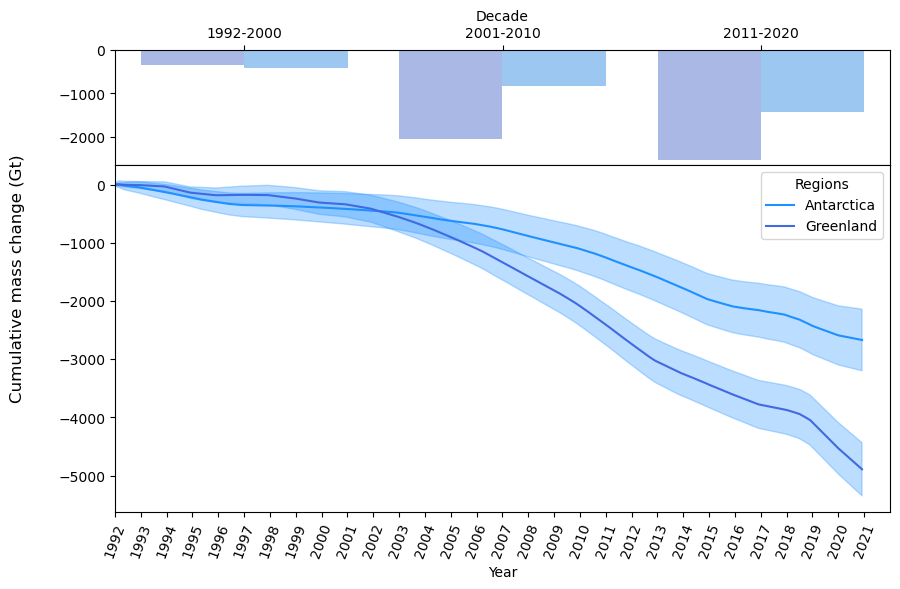

In [136]:
fig, axes = plt.subplots(2,figsize=(10,6),height_ratios=(1,3))

for i in range(2):
    df_ice_sheet_loop = df_ice_sheet_mass_tot.loc[df_ice_sheet_mass_tot["ant/green"] == dict_ice_sheet_mass["column"][i]]
    axes[1].fill_between(df_ice_sheet_loop['Year'],
                     df_ice_sheet_loop['Cumulative mass balance (Gt)'] - df_ice_sheet_loop['Cumulative mass balance uncertainty (Gt)'],
                     df_ice_sheet_loop['Cumulative mass balance (Gt)'] + df_ice_sheet_loop['Cumulative mass balance uncertainty (Gt)'],
                     alpha=0.3, color = dict_ice_sheet_mass["colors"])  # Adjust the transparency as needed

sns.lineplot(data=df_ice_sheet_mass_tot,
             x="Year", 
             y="Cumulative mass balance (Gt)", 
             hue="ant/green", 
             ax=axes[1], 
             palette=["dodgerblue","royalblue"])

sns.barplot(data = df_ice_sheet_mass_decen_encr_melted, 
            x="Decade", 
            y="Cumulative mass balance average (Gt)",
            hue="ant/green",
            alpha=0.5,
            ax=axes[0],
            estimator=sum,
            palette=["royalblue","dodgerblue"])

fig.supylabel("Cumulative mass change (Gt)")

axes[0].get_legend().remove()
axes[0].set(xlabel = "Decade", ylabel= None)
axes[0].xaxis.set_ticks_position('top')
axes[0].xaxis.set_label_position('top')

desired_years = range(1992, 2022, 1)  
axes[1].set(xticks = desired_years, xlim=(1992, 2022), ylabel=None)
axes[1].legend(title='Regions')
axes[1].set_xticklabels(desired_years, rotation=70)


plt.subplots_adjust(hspace=.0)
fig.savefig('figures/Figure_16_Ice sheet mass balance change over time with the decades on top.pdf', format='pdf')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


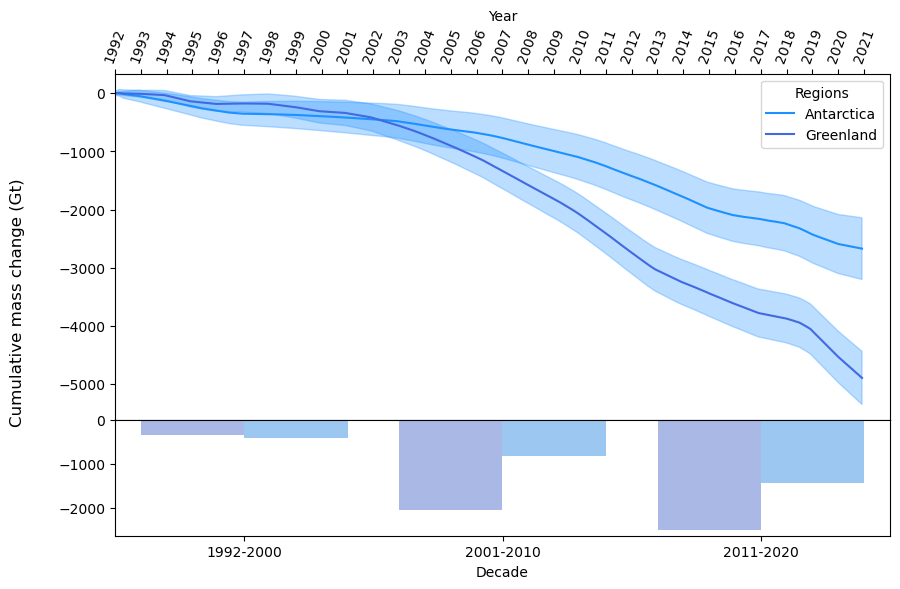

In [137]:
fig, axes = plt.subplots(2,figsize=(10,6),height_ratios=(3,1))

sns.lineplot(data=df_ice_sheet_mass_tot,
             x="Year", 
             y="Cumulative mass balance (Gt)", 
             hue="ant/green", 
             ax=axes[0], 
             palette=["dodgerblue","royalblue"])

sns.barplot(data = df_ice_sheet_mass_decen_encr_melted, 
            x="Decade", 
            y="Cumulative mass balance average (Gt)",
            hue="ant/green",
            alpha=0.5,
            ax=axes[1],
            estimator=sum,
            palette=["royalblue","dodgerblue"])

fig.supylabel("Cumulative mass change (Gt)")

axes[1].get_legend().remove()
axes[1].set(xlabel = "Decade", ylabel= None)

desired_years = range(1992, 2022, 1)  
axes[0].set(xticks = desired_years, xlim=(1992, 2022), ylabel=None)
axes[0].legend(title='Regions')
axes[0].set_xticklabels(desired_years, rotation=70)
axes[0].xaxis.set_ticks_position('top')
axes[0].xaxis.set_label_position('top')

for i in range(2):
    df_ice_sheet_loop = df_ice_sheet_mass_tot.loc[df_ice_sheet_mass_tot["ant/green"] == dict_ice_sheet_mass["column"][i]]
    axes[0].fill_between(df_ice_sheet_loop['Year'],
                     df_ice_sheet_loop['Cumulative mass balance (Gt)'] - df_ice_sheet_loop['Cumulative mass balance uncertainty (Gt)'],
                     df_ice_sheet_loop['Cumulative mass balance (Gt)'] + df_ice_sheet_loop['Cumulative mass balance uncertainty (Gt)'],
                     alpha=0.3, color = dict_ice_sheet_mass["colors"])  # Adjust the transparency as needed

plt.subplots_adjust(hspace=.0)
fig.savefig('figures/Figure_16_Ice sheet mass balance change over time.jpg', format='jpg')
fig.savefig('figures/Figure_16_Ice sheet mass balance change over time.pdf', format='pdf')
fig.savefig('figures/Figure_16_Ice sheet mass balance change over time.eps', format='eps')

## Interactive solution <a id="16_inter"></a>

1. Create a function that make the traces of the graph

In [138]:
def create_ice_sheet_mass_interact_traces(year) :
    frame_list = []
    for i in range(2):
        df_ice_sheet_year_loop = df_ice_sheet_mass_tot.loc[df_ice_sheet_mass_tot["ant/green"] == dict_ice_sheet_mass["column"][i]]
        df_ice_sheet_dec_loop = df_ice_sheet_mass_decen_encr_melted.loc[df_ice_sheet_mass_decen_encr_melted["ant/green"] == dict_ice_sheet_mass["column"][i]][:year+1]
        uncert_trc = go.Scatter(name=dict_ice_sheet_mass["column"][i],
                                x=df_ice_sheet_year_loop["Year"][:12*year+1], 
                                y=df_ice_sheet_year_loop["Cumulative mass balance (Gt)"][:12*year+1], 
                                legendgroup=dict_ice_sheet_mass["column"][i],
                                mode='lines',
                                line=dict(color=dict_ice_sheet_mass["colors_rgb"][i]))

        uncert_fill_trc = go.Scatter(name=dict_ice_sheet_mass["column"][i] + 'uncertainty',
                                     x=df_ice_sheet_year_loop["Year"][:12*year+1],
                                     y=df_ice_sheet_year_loop["Cumulative mass balance (Gt)"][:12*year+1]+df_ice_sheet_year_loop['Cumulative mass balance uncertainty (Gt)'][:12*year+1],
                                     legendgroup=dict_ice_sheet_mass["column"][i],
                                     mode='lines',
                                     marker=dict(color=dict_ice_sheet_mass["colors_rgb"][i]),
                                     line=dict(width=0),
                                     showlegend=False,
                                     hoverinfo='none')

        crv_trc = go.Scatter(name=dict_ice_sheet_mass["column"][i] + 'uncertainty',
                             x=df_ice_sheet_year_loop["Year"][:12*year+1],
                             y=df_ice_sheet_year_loop["Cumulative mass balance (Gt)"][:12*year+1]-df_ice_sheet_year_loop['Cumulative mass balance uncertainty (Gt)'][:12*year+1],
                             legendgroup=dict_ice_sheet_mass["column"][i],
                             marker=dict(color=dict_ice_sheet_mass["colors_rgb"][i]),
                             line=dict(width=0),
                             mode='lines',
                             fillcolor=dict_ice_sheet_mass["colors_rgba"][i],
                             opacity=0.5,
                             fill='tonexty',
                             showlegend=False,
                             hoverinfo='none')

        dec_aver_trc = go.Bar(name=dict_ice_sheet_mass["column"][i] + 'decadal decreasing',
                              x=df_ice_sheet_dec_loop["Decade"], 
                              y=df_ice_sheet_dec_loop["Cumulative mass balance average (Gt)"],
                              legendgroup=dict_ice_sheet_mass["column"][i],
                              marker=dict(color=dict_ice_sheet_mass["colors_rgb"][i]),
                              showlegend=False)
        
        initial_y_values = [0] * len(df_ice_sheet_dec_loop["Decade"])
        dec_aver_trc.y = initial_y_values
        for decade in range(3):
            if list(df_ice_sheet_year_loop["Year"][:12*year+1])[-1] >= 2000+10*decade:
                # Update y values for the specific frame
                initial_y_values[decade] = list(df_ice_sheet_dec_loop["Cumulative mass balance average (Gt)"])[decade]
                dec_aver_trc.y = initial_y_values

        frame_list.append([uncert_trc, uncert_fill_trc, crv_trc , dec_aver_trc])
    return(frame_list)

2. Create a function that display the interactive graph  

In [139]:
def plot_ice_sheet_mass_interact():
    fig = make_subplots(rows=2, cols=1, row_heights =[0.7, 0.3])

    frame_list = create_ice_sheet_mass_interact_traces(29)
    # Add traces to the figure
    for i in range(len(frame_list)):
        fig.add_trace(frame_list[i][0], row=1, col=1)
        fig.add_trace(frame_list[i][1], row=1, col=1)
        fig.add_trace(frame_list[i][2], row=1, col=1)
        fig.add_trace(frame_list[i][3], row=2, col=1)

    fig.update_layout(height=600, width=800, 
                      title_text="Cumulative Ice Mass Change (GT)", 
                      legend=dict(yanchor="top", y=0.55, xanchor="left", x=0.01),
                      dragmode=False,
                      modebar_remove=plotly_config)


    fig.show(config = plotly_config)

    py.plot(fig, filename= "Ice sheet mass balance change over time", auto_open=False)

In [140]:
plot_ice_sheet_mass_interact()

## GIF solution <a id="16_gif"></a>

This animated image has been used for the official publications on Linkedin and X. <br>
Link to the publication : TODO

<img src="figures/animations/Figure_16_Ice sheet mass balance change over time.gif" width="750" align="center">

1. Create a function that save an animation gif graph


In [141]:
def save_ice_sheet_mass_gif(): 
    pic_list = []
    for n in range(2,30):
        frame_list = create_ice_sheet_mass_interact_traces(n)
        fig = make_subplots(rows=2, cols=1, row_heights =[0.7, 0.3])
        # Add traces to the figure
        for i in range(len(frame_list)):
            fig.add_trace(frame_list[i][0], row=1, col=1)
            fig.add_trace(frame_list[i][1], row=1, col=1)
            fig.add_trace(frame_list[i][2], row=1, col=1)
            fig.add_trace(frame_list[i][3], row=2, col=1)

        fig.update_layout(height=600, width=800, 
                          title_text="Cumulative Ice Mass Change (GT)", 
                          legend=dict(yanchor="top", y=0.55, xanchor="left", x=0.01),
                          dragmode=False,
                          modebar_remove=plotly_config)
        pic_frame = PIL.Image.open(io.BytesIO(fig.to_image(format="png")))
        pic_list.append(pic_frame)
    for i in range(8):
        pic_list.append(pic_frame)
        
    frame_one = pic_list[0]
    print(frame_one)
    frame_one.save("figures/animations/Figure_16_Ice sheet mass balance change over time.gif", 
                    format="GIF", 
                    append_images=pic_list,
                    save_all=True, 
                    duration=300, loop=0)


In [142]:
save_ice_sheet_mass_gif()

<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=800x600 at 0x1C5CE9B3950>


***
# Figure 17: Seasonal maximum and minimum sea ice extent <a id="17"></a>

Caption : Seasonal maximum (top) and minimum (bottom) sea ice extent for the Arctic (left) and Antarctic (right) by decade, with annual values and a 10-year moving average overlaid

## Cleaning

1. Extract the data


In [143]:
df_sea_ice_season_extr = pd.read_csv("data/figure-16-17/Figure 17 source data - Sea ice seasonal extremes.csv") 

2. Create a dictionary containing all the parametres

In [177]:
dict_sea_ice_season = {
    "x_labels" : [None, "year", None,  "year"],
    "y_labels" : ["Maximum", "Minimum",None, None],
    "y_lim" : [(14, 17), (3.0,8), (17.5, 20.5), (1.5,4)],
    "legend_labels" : ["Annual value", "Moving average"],
    "legend_show" : [True, False, False, False],
    "title" : [ "Arctic", None, "Antarctic", None],
    "title_inter" : [ "Arctic", "Antarctic",None, None],
    "values" : ["NH max", "NH min", "SH max", "SH min"],
    "mean" : ["10-year mean NH max", "10-year mean NH min", "10-year mean SH max", "10-year mean SH min"],
    "colors" : ["b", "b","dodgerblue", "dodgerblue"],
    "colors_rgb" : ["rgb(65,105,225)", "rgb(65,105,225)", "rgb(30,144,255)", "rgb(30,144,255)"],
    "colors_rgba" : ["rgba(65,105,225,0.3)", "rgba(65,105,225,0.3)", "rgba(30,144,255,0.3)", "rgba(30,144,255,0.3)"],
    "emplac" : [[0,0],[1,0],[0,1], [1,1]]
}


3. Adapt the dataframe 

In [162]:
df_sea_ice_season_extr_1 = df_sea_ice_season_extr.drop([0,1,2,3,4,5])
df_sea_ice_season_extr_2 = df_sea_ice_season_extr_1.rename(columns={'Unnamed: 0': 'Date',
                                                '1979': 'NH max',
                                                '1980': 'NH min',
                                                '1981': 'SH max',
                                                '1982': 'SH min',
                                                '1983': '10-year mean NH max',
                                                '1984': '10-year mean NH min',
                                                '1985': '10-year mean SH max',
                                                '1986': '10-year mean SH min'
                                                })
df_sea_ice_season_extr_cleaned = df_sea_ice_season_extr_2.loc[:, ['Date',
                                                            'NH max',
                                                            'NH min',
                                                            'SH max',
                                                            'SH min',
                                                            '10-year mean NH max',
                                                            '10-year mean NH min',
                                                            '10-year mean SH max',
                                                            '10-year mean SH min']]
df_sea_ice_season_extr_cleaned['Date'] = df_sea_ice_season_extr_cleaned['Date'].astype(float)
for i in range (4):
    df_sea_ice_season_extr_cleaned[dict_sea_ice_season["values"][i]] = df_sea_ice_season_extr_cleaned[dict_sea_ice_season["values"][i]].astype(float)
    df_sea_ice_season_extr_cleaned[dict_sea_ice_season["mean"][i]] = df_sea_ice_season_extr_cleaned[dict_sea_ice_season["mean"][i]].astype(float)


4. Create a dataframe of the decadal averages

In [163]:
series_list = []
for i in range(4):
    mean_of_the_decade = df_sea_ice_season_extr_cleaned.loc[df_sea_ice_season_extr_cleaned["Date"].between(1981+10*i, 1990+10*i),["Date","NH max","NH min","SH max","SH min"]].mean(axis=0)
    mean_of_the_decade_series = pd.Series(mean_of_the_decade, name=f'{1981+10*i} - {1990+10*i}')
    series_list.append(mean_of_the_decade_series)
df_mean_mean_of_the_decade = pd.DataFrame({s.name: s for s in series_list}).T
df_mean_mean_of_the_decade["Date"] = df_mean_mean_of_the_decade["Date"] +0.5
df_mean_mean_of_the_decade


,Date,NH max,NH min,SH max,SH min
1981 - 1990,1986.0,16.0992,6.8396,18.5175,2.7775
1991 - 2000,1996.0,15.6285,6.4588,18.7915,2.6945
2001 - 2010,2006.0,15.2174,5.3610,18.8287,3.0569
2011 - 2020,2016.0,14.7822,4.3743,18.9317,2.8503


5. Display the graph

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


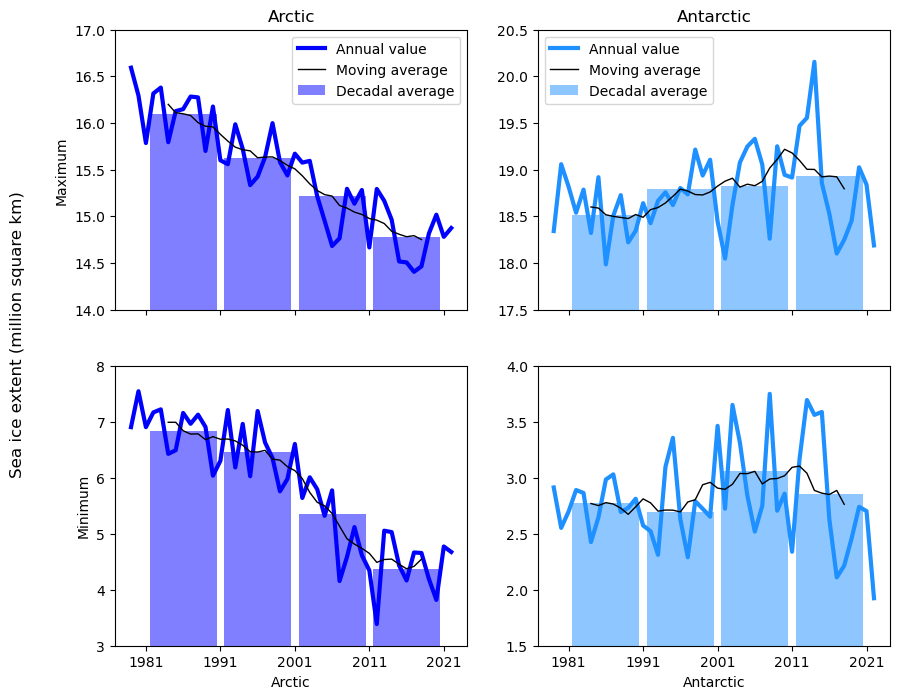

In [164]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, figsize = (10,8))
fig.supylabel("Sea ice extent (million square km)")
#plt.suptitle("arctic (North) maximum sea ice extent")

for i in range(4): 
    axe = axes[dict_sea_ice_season["emplac"][i][0]][dict_sea_ice_season["emplac"][i][1]]
    sns.lineplot(
        data=df_sea_ice_season_extr_cleaned,
        x="Date", y=dict_sea_ice_season["values"][i],color = dict_sea_ice_season["colors"][i],
        label=dict_sea_ice_season["legend_labels"][0], lw=3, 
        ax=axe)
    sns.lineplot(
        data=df_sea_ice_season_extr_cleaned,
        x="Date",y=dict_sea_ice_season["mean"][i],color = "black",
        label=dict_sea_ice_season["legend_labels"][1], lw=1, 
        ax=axe)

    axe.bar(
        df_mean_mean_of_the_decade["Date"], 
        df_mean_mean_of_the_decade[dict_sea_ice_season["values"][i]],
        width=9,
        alpha=0.5,
        color = dict_sea_ice_season["colors"][i],
        label="Decadal average")
    axe.set(xlabel = dict_sea_ice_season["x_labels"][i] ,
           ylabel = dict_sea_ice_season["y_labels"][i],
           ylim = dict_sea_ice_season["y_lim"][i],
           title = dict_sea_ice_season["title"][i])

desired_years = range(1981, 2022, 10)  # Adjust as needed
axes[1][0].set_xticks(desired_years)
axes[1][0].set_xticklabels([str(year) for year in desired_years])


axes[0][0].legend()
axes[0][1].legend()
axes[1][0].get_legend().remove()
axes[1][1].get_legend().remove()


fig.savefig('figures/Figure_17_Minimum sea ice extent.eps', format='eps')
fig.savefig('figures/Figure_17_Minimum sea ice extent.pdf', format='pdf')
fig.savefig('figures/Figure_17_Minimum sea ice extent.png', format='png')

## Interactive solution <a id="17_inter"></a>

1. Create a function that make the traces of the graph

In [178]:
# Sample data
def create_sea_ice_extent_interact_traces(year) :
    fig = make_subplots(rows=2, cols=2)

    frame_list = []
    for i in range(4): 
        crv_trc = go.Scatter(name='Annual values',
                       x=df_sea_ice_season_extr_cleaned["Date"][:year+1], 
                       y=df_sea_ice_season_extr_cleaned[dict_sea_ice_season["values"][i]][:year+1], 
                       mode='lines',
                       line=dict(color=dict_sea_ice_season["colors_rgb"][i]),
                       legendgroup='Annual values',
                       showlegend = dict_sea_ice_season["legend_show"][i])

        mov_aver_trc = go.Scatter(name='Moving Average',
                       x=df_sea_ice_season_extr_cleaned["Date"][:year+1], 
                       y=df_sea_ice_season_extr_cleaned[dict_sea_ice_season["mean"][i]][:year+1], 
                       mode='lines',
                       line=dict(color='rgb(0,0,0)'),
                       legendgroup='Moving Average',
                       showlegend = dict_sea_ice_season["legend_show"][i])

        dec_aver_trc = go.Bar(name='Decadal values',
                              x=df_mean_mean_of_the_decade["Date"], 
                              y=df_mean_mean_of_the_decade[dict_sea_ice_season["values"][i]],
                              marker=dict(color=dict_sea_ice_season["colors_rgba"][i]),
                              legendgroup="Decadal values",
                              showlegend = dict_sea_ice_season["legend_show"][i])
        
        
        initial_y_values = [0] * len(df_mean_mean_of_the_decade["Date"])
        dec_aver_trc.y = initial_y_values
        for decade in range(4):
            if list(df_sea_ice_season_extr_cleaned["Date"][:year+1])[-1] >= 1980+10*(decade+1):
                initial_y_values[decade] = list(df_mean_mean_of_the_decade[dict_sea_ice_season["values"][i]])[decade]
                dec_aver_trc.y = initial_y_values


        frame_list.append([crv_trc, mov_aver_trc, dec_aver_trc])
    return(frame_list)

2. Create a function that display the interactive graph  

In [184]:
def plot_sea_ice_extent_interact():
    fig = make_subplots(rows=2, cols=2, subplot_titles=dict_sea_ice_season["title_inter"])

    frame_list = create_sea_ice_extent_interact_traces(42)    
    # Add traces to the figure
    for i in range(len(frame_list)):
        fig.add_trace(frame_list[i][0], 
                      row=dict_sea_ice_season["emplac"][i][0]+1, 
                      col=dict_sea_ice_season["emplac"][i][1]+1)
        fig.add_trace(frame_list[i][1],
                      row=dict_sea_ice_season["emplac"][i][0]+1, 
                      col=dict_sea_ice_season["emplac"][i][1]+1)
        fig.add_trace(frame_list[i][2],
                      row=dict_sea_ice_season["emplac"][i][0]+1, 
                      col=dict_sea_ice_season["emplac"][i][1]+1)
        fig.update_yaxes(range=dict_sea_ice_season["y_lim"][i],
                         title=dict_sea_ice_season["y_labels"][i],
                         row=dict_sea_ice_season["emplac"][i][0]+1, 
                         col=dict_sea_ice_season["emplac"][i][1]+1)
        fig.update_xaxes(title=dict_sea_ice_season["x_labels"][i],
                         row=dict_sea_ice_season["emplac"][i][0]+1, 
                         col=dict_sea_ice_season["emplac"][i][1]+1)


    fig.update_layout(height=600, width=800, 
                      title_text="Sea ice extent (million square km)",
                      dragmode=False,
                      modebar_remove=plotly_config)
    fig.show()

    py.plot(fig, filename= "Max-Min sea ice extent", auto_open=False)

In [185]:
plot_sea_ice_extent_interact()

## GIF solution <a id="17_gif"></a>
This animated image has been used for the official publications on Linkedin and X. <br>
Link to the publication : TODO

<img src="figures/animations/Figure_17_Sea ice seasonal extremes.gif" width="750" align="center">


1. Create a function that save an animation gif graph

In [186]:
def save_sea_ice_extent_gif(): 
    pic_list = []
    for n in range(2,42):
        frame_list = create_sea_ice_extent_interact_traces(n)
        fig = make_subplots(rows=2, cols=2, subplot_titles = dict_sea_ice_season["title_inter"])
        fig.update_layout(height=600, width=800, 
                          title_text="Sea ice extent (million square km)",
                          dragmode=False,
                          modebar_remove=plotly_config)
        for i in range(len(frame_list)):
            fig.add_trace(frame_list[i][0], 
                          row=dict_sea_ice_season["emplac"][i][0]+1, 
                          col=dict_sea_ice_season["emplac"][i][1]+1)
            fig.add_trace(frame_list[i][1],
                          row=dict_sea_ice_season["emplac"][i][0]+1, 
                          col=dict_sea_ice_season["emplac"][i][1]+1)
            fig.add_trace(frame_list[i][2],
                          row=dict_sea_ice_season["emplac"][i][0]+1, 
                          col=dict_sea_ice_season["emplac"][i][1]+1)
            fig.update_yaxes(range=dict_sea_ice_season["y_lim"][i],
                             title=dict_sea_ice_season["y_labels"][i],
                             row=dict_sea_ice_season["emplac"][i][0]+1, 
                             col=dict_sea_ice_season["emplac"][i][1]+1)
            fig.update_xaxes(title=dict_sea_ice_season["x_labels"][i],
                             row=dict_sea_ice_season["emplac"][i][0]+1, 
                             col=dict_sea_ice_season["emplac"][i][1]+1)

        
        pic_frame = PIL.Image.open(io.BytesIO(fig.to_image(format="png")))
        pic_list.append(pic_frame)
    for i in range(8):
        pic_list.append(pic_frame)
        
    frame_one = pic_list[0]
    print(frame_one)
    frame_one.save("figures/animations/Figure_17_Sea ice seasonal extremes.gif", 
                    format="GIF", 
                    append_images=pic_list,
                    save_all=True, 
                    duration=300, loop=0)


In [187]:
save_sea_ice_extent_gif()

<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=800x600 at 0x1C5BF030850>


***
# Figure 19 : Oceanic Nino Index time series <a id="19"></a>

Caption : NOAA Oceanic Nino 3.4 Index for the 2011-2020 decade. Sustained values above 0.5 °C are indicative of El Niño events (red) and those below −0.5 °C are indicative of La Niña events (blue). 


## Cleaning

1. Extract the data

In [153]:
df_oce_nino = pd.read_csv("data/figure-20/Figure 20 - source data - Oceanic Nino Index 2011-20.csv") 


2. Display the graph

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


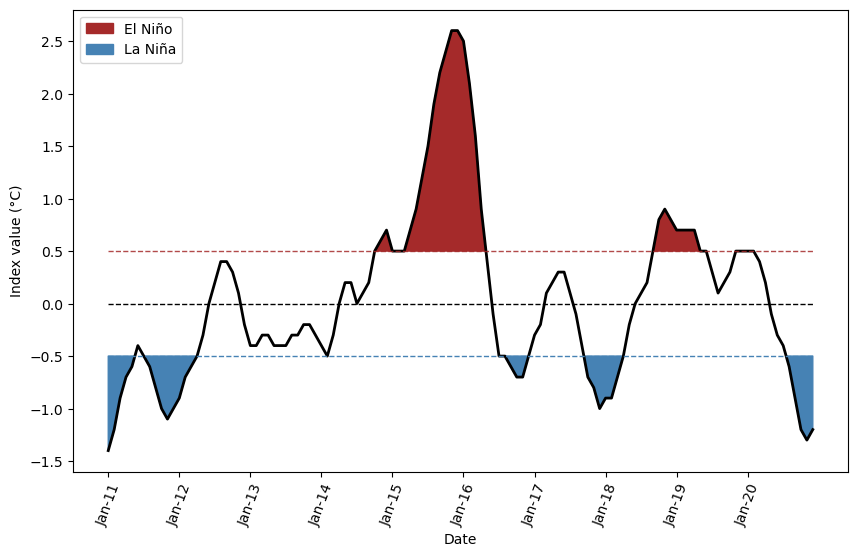

In [154]:
fig, ax = plt.subplots(figsize = (10,6))
sns.lineplot(x=df_oce_nino["Date"],
             y=df_oce_nino["Value"],
             color = "black",
             lw=2,
             ax=ax)
plt.xlabel("Date")

plt.xticks(df_oce_nino["Date"][::12] , rotation=70)
plt.ylabel("Index value (°C)")

list_05 = [ 0.5 for x in range(df_oce_nino.shape[0])]
list_0 = [ 0 for x in range(df_oce_nino.shape[0])]
list_moin_05 = [-0.5 for x in range(df_oce_nino.shape[0])]
list_oce_nino_val = df_oce_nino["Value"].tolist()
list_oce_nino_dat = df_oce_nino["Date"].tolist()


condition1 = [y1_val > y2_val for y1_val, y2_val in zip(list_oce_nino_val, list_05)]
condition2 = [y1_val < y2_val for y1_val, y2_val in zip(list_oce_nino_val, list_moin_05)]

ax.fill_between(list_oce_nino_dat, 0.5, list_oce_nino_val,where = condition1,interpolate=True, color= "brown", alpha=1, label="El Niño")
ax.fill_between(list_oce_nino_dat, -0.5, list_oce_nino_val,where = condition2,interpolate=True, color ="steelblue", label='La Niña')
ax.legend(loc='upper left')
ax.plot(list_oce_nino_dat, list_05, lw=1, label='population mean', color= "brown", alpha=0.85, ls='--')
ax.plot(list_oce_nino_dat, list_moin_05, lw=1, label='population mean', color='steelblue', ls='--')
ax.plot(list_oce_nino_dat, list_0, lw=1, label='population mean', color='black', ls='--')

fig.savefig('figures/Figure_20_Oceanic Nino Index 2011-20.eps', format='eps', bbox_inches='tight')
fig.savefig('figures/Figure_20_Oceanic Nino Index 2011-20.png', format='png', bbox_inches='tight')

***
# Figure 21 : Number of reported weather-related disasters with more than 1000 deaths or more than US&dollar;10B economic losses (2022 dollars) <a id="21"></a>

Caption : Left: Number of reported weather-related disasters with more than 1000 deaths by disaster type and region. Right: Number of reported disasters with more than USD 10B in economic losses (2022 dollars) by disaster type and region

## Cleaning

1. Extract the data

In [155]:
df_weat_disas = pd.read_csv("data/figure-21-22/Disaster list by type-region.csv") 

2. Rename and re-index the dataframe

In [156]:
df_weat_disas_index = df_weat_disas.set_index("Event type").T.reset_index().rename(columns={'index': 'Regions'})

## Left: Number of reported weather-related disasters with more than 1000 deaths 

1. Reshape the dataframe based on the "more than 1000 deaths" values

In [157]:
df_weat_disas_index_matrix_death_all = df_weat_disas_index.loc[df_weat_disas_index["death/losses"] == "1000 deaths"].drop("death/losses", axis=1).rename(columns={'Event type': 'Regions'}).set_index("Regions")
df_weat_disas_index_matrix_death_all = df_weat_disas_index_matrix_death_all.drop(['Drought', 'Wildfire', 'Severe storms/tornadoes'], axis=1)
df_weat_disas_index_matrix_death_all = df_weat_disas_index_matrix_death_all.astype(float)
df_weat_disas_index_matrix_death_all

Event type,Tropical cyclone,Flood (non-TC)/landslide,Heatwave
Regions,,,
Africa.1,0.0,1.0,0.0
Asia.1,3.0,3.0,2.0
Europe.1,0.0,0.0,4.0
N America.1,0.0,0.0,0.0


2. Display the graph

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


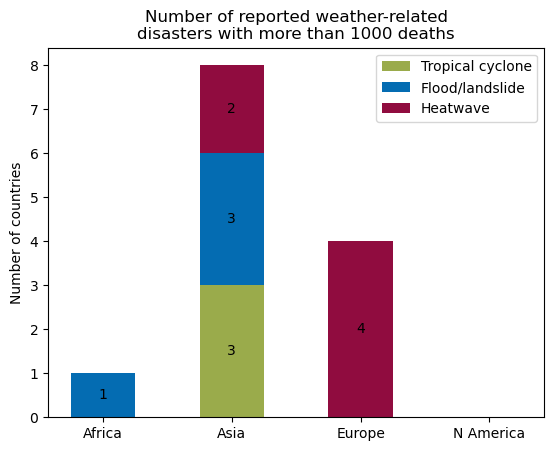

In [158]:
outer_colors = ["#9aab4b", "#046cb2", "#900c3f"]

trop_death = df_weat_disas_index_matrix_death_all.loc[:,"Tropical cyclone"]
flood_death = df_weat_disas_index_matrix_death_all.loc[:,"Flood (non-TC)/landslide"]
heat_death = df_weat_disas_index_matrix_death_all.loc[:,"Heatwave"]
country = ["Africa","Asia","Europe","N America"]
events_death = ["Tropical cyclone","Flood/landslide","Heatwave"]
w = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(3)

plt.bar(country,
        trop_death, w,
        color = outer_colors[0], 
        label = events_death[0] )
plt.bar(country,
        flood_death, w,
        bottom=trop_death,
        color = outer_colors[1],
       label = events_death[1] )
plt.bar(country,
        heat_death, w,
        bottom=trop_death+flood_death, 
        color = outer_colors[2],
        label = events_death[2] )

ax.set_title("Number of reported weather-related\ndisasters with more than 1000 deaths")
ax.legend(loc="upper right")
for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    label_text = height
    label_x = x + width / 2
    label_y = y + height / 2
    if label_text != 0:
        ax.text(label_x, label_y, int(label_text), ha='center',va='center')

plt.ylabel("Number of countries")
fig.savefig('figures/Figure_21_Weather-related disasters with more than 1000 deaths.jpg', format='jpg')
fig.savefig('figures/Figure_21_Weather-related disasters with more than 1000 deaths.eps', format='eps')


## Right: Number of reported weather-related disasters with more than US$10B economic losses (2022 dollars)

1. Reshape the dataframe based on the "more than US$10B economic losses" values

In [159]:
df_weat_disas_index_matrix_loss_all = df_weat_disas_index.loc[df_weat_disas_index["death/losses"] == "$10B losses"].drop("death/losses", axis=1).rename(columns={'Event type': 'Regions'}).set_index("Regions")
df_weat_disas_index_matrix_loss_all = df_weat_disas_index_matrix_loss_all.drop(['Heatwave'], axis=1).astype(float)
df_weat_disas_index_matrix_loss_all

Event type,Tropical cyclone,Flood (non-TC)/landslide,Drought,Wildfire,Severe storms/tornadoes
Regions,,,,,
Africa,0.0,0.0,0.0,0.0,0.0
Asia,5.0,5.0,0.0,0.0,0.0
Europe,0.0,1.0,0.0,0.0,0.0
N America,8.0,2.0,1.0,3.0,2.0


2. Display the graph

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


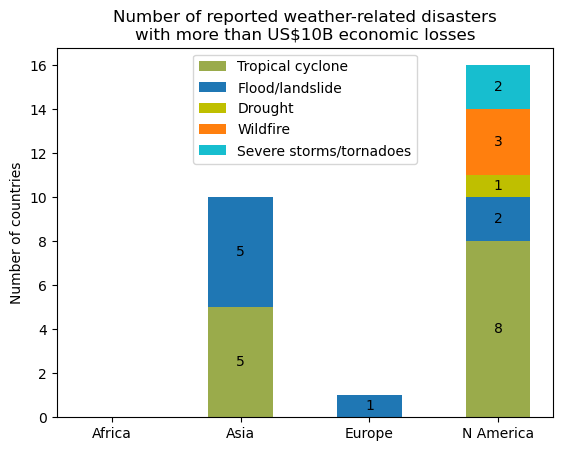

In [160]:
import matplotlib.pyplot as plt
import numpy as np


outer_colors = ["#9aab4b","tab:blue","y","tab:orange","tab:cyan"]


trop_loss = df_weat_disas_index_matrix_loss_all.loc[:,"Tropical cyclone"]
flood_loss = df_weat_disas_index_matrix_loss_all.loc[:,"Flood (non-TC)/landslide"]
droug_loss = df_weat_disas_index_matrix_loss_all.loc[:,"Drought"]
fire_loss = df_weat_disas_index_matrix_loss_all.loc[:,"Wildfire"]
storm_loss = df_weat_disas_index_matrix_loss_all.loc[:,"Severe storms/tornadoes"]


country = ["Africa","Asia","Europe","N America"]
events_loss = ["Tropical cyclone","Flood/landslide","Drought","Wildfire","Severe storms/tornadoes"]
w = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(5)

plt.bar(country,
        trop_loss, w,
        color = outer_colors[0], 
        label = events_loss[0] )
plt.bar(country,
        flood_loss, w,
        bottom=trop_loss,
        color = outer_colors[1],
       label = events_loss[1] )
plt.bar(country,
        droug_loss, w,
        bottom=trop_loss+flood_loss, 
        color = outer_colors[2],
        label = events_loss[2] )

plt.bar(country,
        fire_loss, w,
        bottom=trop_loss + flood_loss + droug_loss, 
        color = outer_colors[3],
        label = events_loss[3] )
plt.bar(country,
        storm_loss, w,
        bottom=trop_loss+flood_loss + droug_loss + fire_loss, 
        color = outer_colors[4],
        label = events_loss[4] )

ax.set_title("Number of reported weather-related disasters\nwith more than US$10B economic losses")
ax.legend(loc="upper center")
for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    label_text = height
    label_x = x + width / 2
    label_y = y + height / 2
    if label_text != 0:
        ax.text(label_x, label_y, int(label_text), ha='center',va='center')

plt.ylabel("Number of countries")

fig.savefig('figures/Figure_22_Weather-related disasters with more than US$10B economic losses.jpg', format='jpg')
fig.savefig('figures/Figure_22_Weather-related disasters with more than US$10B economic losses.eps', format='eps')
